### Problem Statement:

In ever-changing competitive market conditions, there is a need to make correct 
decisions and plans for future events related to business like sales, production, and 
many more. The effectiveness of a decision taken by business managers is influenced by 
the accuracy of the models used. Demand is the most important aspect of a business's 
ability to achieve its objectives. Many decisions in business depend on **demand**, like 
production, sales, and staff requirements. **Forecasting** is necessary for business at both 
international and domestic levels.

### Problem Objective

Fresh Analytics, a data analytics company, aims to **comprehend and predict the demand 
for various items across restaurants.** The primary goal of the project is to **determine the 
sales of items across different restaurants over the years.**

### Outline

Preliminary analysis:
a. Import the datasets into the Python environment 
b. Examine the dataset's shape and structure, and look out for any outlier 
c. Merge the datasets into a single dataset that includes the date, item id, price, item count, item 
names, kcal values, store id, and store name

Exploratory data analysis:
a. Examine the overall date wise sales to understand the pattern 
b. Find out how sales fluctuate across different days of the week 
c. Look for any noticeable trends in the sales data for different months of the year 
d. Examine the sales distribution across different quarters averaged over the years. Identify any 
noticeable patterns. 
e. Compare the performances of the different restaurants. Find out which restaurant had the most 
sales and look at the sales for each restaurant across different years, months, and days.
f. Identify the most popular items overall and the stores where they are being sold. Also, find 
out the most popular item at each store 
g. Determine if the store with the highest sales volume is also making the most money per day 
h. Identify the most expensive item at each restaurant and find out its calorie count

Forecasting using machine learning algorithms:
a. Build and compare linear regression, random forest, and XGBoost models for predictions 
• Generate necessary features for the development of these models, like day of the week, 
quarter of the year, month, year, day of the month and so on
• Use the data from the last six months as the testing data 
• Compute the root mean square error (RMSE) values for each model to compare their 
performances 
• Use the best-performing models to make a forecast for the next year

Forecasting using deep learning algorithms:
a. Use sales amount for predictions instead of item count
b. Build a long short-term memory (LSTM) model for predictions 
• Define the train and test series 
• Generate synthetic data for the last 12 months 
• Build and train an LSTM model 
• Use the model to make predictions for the test data 
c. Calculate the mean absolute percentage error (MAPE) and comment on the model's performance 
d. Develop another model using the entire series for training, and use it to forecast for the next three 
months



### Import Required Libraries

In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Import the datasets, examine their shape and structure, look for outliers and merge them into one dataset

In [116]:
# Define the file paths

restaurants_file_path = r"C:\Users\Sonal\Downloads\Datasets (2) - capstone\Capstone 3\resturants.csv"
sales_file_path = r"C:\Users\Sonal\Downloads\Datasets (2) - capstone\Capstone 3\sales.csv"
items_file_path = r"C:\Users\Sonal\Downloads\Datasets (2) - capstone\Capstone 3\items.csv"

In [117]:
# Create a dataframe for each dataset

restaurants_df = pd.read_csv(restaurants_file_path)
sales_df = pd.read_csv(sales_file_path)
items_df = pd.read_csv(items_file_path)

In [118]:
restaurants_df.shape

(6, 2)

In [119]:
restaurants_df

,id,name
0,1,Bob's Diner
1,2,Beachfront Bar
2,3,Sweet Shack
3,4,Fou Cher
4,5,Corner Cafe
5,6,Surfs Up


#### There are 6 restaurants. Each has a store id.

In [120]:
sales_df.shape

(109600, 4)

In [121]:
sales_df.head()

,date,item_id,price,item_count
0,2019-01-01,3,29.22,2.0
1,2019-01-01,4,26.42,22.0
2,2019-01-01,12,4.87,7.0
3,2019-01-01,13,4.18,12.0
4,2019-01-01,16,3.21,136.0


In [122]:
sales_df.describe()

,item_id,price,item_count
count,109600.000000,109600.000000,109600.000000
mean,50.500000,11.763700,6.339297
std,28.866202,8.946225,30.003728
min,1.000000,1.390000,0.000000
25%,25.750000,5.280000,0.000000
50%,50.500000,7.625000,0.000000
75%,75.250000,18.790000,0.000000
max,100.000000,53.980000,570.000000


#### There are 109,600 records. The cheapest item purchased is 1.39. The most expensive item purchased is 53.98. There is a record for each item on every day for three years. The majority of these records show a zero item count because each item is accounted for on each day. 75% of the records have an item count of zero, indicating that we might be able to trim the dataset.

In [123]:
items_df.shape

(100, 5)

In [124]:
items_df.head()

,id,store_id,name,kcal,cost
0,1,4,Chocolate Cake,554,6.71
1,2,4,Breaded Fish with Vegetables Meal,772,15.09
2,3,1,Sweet Fruity Cake,931,29.22
3,4,1,Amazing Steak Dinner with Rolls,763,26.42
4,5,5,Milk Cake,583,6.07


#### There are 100 items sold across the six restaurants. We have information on the names of the items, how much each costs and how many calories each has. 

### Merge the datasets to create a single df with all relevant information.

In [125]:
# Combine the sales dataframe and items dataframe so that each sales record shows the item name, store id, kcal and cost

merged_df_1 = pd.merge(sales_df, items_df, left_on='item_id', right_on='id', how='left')

In [126]:
merged_df_1.head()

,date,item_id,price,item_count,id,store_id,name,kcal,cost
0,2019-01-01,3,29.22,2.0,3,1,Sweet Fruity Cake,931,29.22
1,2019-01-01,4,26.42,22.0,4,1,Amazing Steak Dinner with Rolls,763,26.42
2,2019-01-01,12,4.87,7.0,12,1,Fantastic Sweet Cola,478,4.87
3,2019-01-01,13,4.18,12.0,13,1,Sweet Frozen Soft Drink,490,4.18
4,2019-01-01,16,3.21,136.0,16,1,Frozen Milky Smoothy,284,3.21


In [127]:
# Add restaurant name to each sales record

merged_df_final = pd.merge(merged_df_1, restaurants_df, left_on='store_id', right_on='id') 

In [128]:
merged_df_final.head()

,date,item_id,price,item_count,id_x,store_id,name_x,kcal,cost,id_y,name_y
0,2019-01-01,3,29.22,2.0,3,1,Sweet Fruity Cake,931,29.22,1,Bob's Diner
1,2019-01-01,4,26.42,22.0,4,1,Amazing Steak Dinner with Rolls,763,26.42,1,Bob's Diner
2,2019-01-01,12,4.87,7.0,12,1,Fantastic Sweet Cola,478,4.87,1,Bob's Diner
3,2019-01-01,13,4.18,12.0,13,1,Sweet Frozen Soft Drink,490,4.18,1,Bob's Diner
4,2019-01-01,16,3.21,136.0,16,1,Frozen Milky Smoothy,284,3.21,1,Bob's Diner


In [129]:
# Remove duplicated columns

features_to_remove = ['id_x', 'item_id', 'cost','id_y']
df_final = merged_df_final.drop(features_to_remove, axis=1)

In [130]:
#Rename name_x and name_y columns to be clear. Rename price column to be clear that is the price of an individual item, not the total price

df_final.rename(columns={'name_x': 'item_name', 'name_y': 'restaurant_name', 'price': 'price_per_unit'}, inplace=True)


In [131]:
df_final.head()

,date,price_per_unit,item_count,store_id,item_name,kcal,restaurant_name
0,2019-01-01,29.22,2.0,1,Sweet Fruity Cake,931,Bob's Diner
1,2019-01-01,26.42,22.0,1,Amazing Steak Dinner with Rolls,763,Bob's Diner
2,2019-01-01,4.87,7.0,1,Fantastic Sweet Cola,478,Bob's Diner
3,2019-01-01,4.18,12.0,1,Sweet Frozen Soft Drink,490,Bob's Diner
4,2019-01-01,3.21,136.0,1,Frozen Milky Smoothy,284,Bob's Diner


In [132]:
# Look for missing values

df_final.isna().sum()

date               0
price_per_unit     0
item_count         0
store_id           0
item_name          0
kcal               0
restaurant_name    0
dtype: int64

In [133]:
# Look for duplicates

df_final.duplicated().sum()

0

### Feature Engineering

In [134]:
#Convert date format to datetime format

df_final['date'] = pd.to_datetime(df_final['date'])

#Extract Week, Month, Quarter and Year

df_final['week'] = df_final['date'].dt.isocalendar().week
df_final['month'] = df_final['date'].dt.month
df_final['quarter'] = df_final['date'].dt.quarter
df_final['year'] = df_final['date'].dt.year

# Extract the day of the week; Monday=0, Sunday=6
df_final['day_of_week'] = df_final['date'].dt.dayofweek

# Map the day indices to day names for clearer visualization
day_names = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
df_final['day_of_week'] = df_final['day_of_week'].map(day_names)

In [135]:
# Create columns with total income from each sale

df_final['total_income_from_each_item'] = df_final['item_count'] * df_final['price_per_unit']

In [136]:
df_final.head()

,date,price_per_unit,item_count,store_id,item_name,kcal,restaurant_name,week,month,quarter,year,day_of_week,total_income_from_each_item
0,2019-01-01,29.22,2.0,1,Sweet Fruity Cake,931,Bob's Diner,1,1,1,2019,Tuesday,58.44
1,2019-01-01,26.42,22.0,1,Amazing Steak Dinner with Rolls,763,Bob's Diner,1,1,1,2019,Tuesday,581.24
2,2019-01-01,4.87,7.0,1,Fantastic Sweet Cola,478,Bob's Diner,1,1,1,2019,Tuesday,34.09
3,2019-01-01,4.18,12.0,1,Sweet Frozen Soft Drink,490,Bob's Diner,1,1,1,2019,Tuesday,50.16
4,2019-01-01,3.21,136.0,1,Frozen Milky Smoothy,284,Bob's Diner,1,1,1,2019,Tuesday,436.56


#### For now, I will shorten the dataset to only show actual sales (by removing the records that show an item_count of zero)

In [137]:
df_actual_sales = df_final[df_final['item_count'] != 0]

In [138]:
df_actual_sales.shape

(23484, 13)

array([[<Axes: title={'center': 'date'}>,
        <Axes: title={'center': 'price_per_unit'}>,
        <Axes: title={'center': 'item_count'}>],
       [<Axes: title={'center': 'store_id'}>,
        <Axes: title={'center': 'kcal'}>,
        <Axes: title={'center': 'week'}>],
       [<Axes: title={'center': 'month'}>,
        <Axes: title={'center': 'quarter'}>,
        <Axes: title={'center': 'year'}>],
       [<Axes: title={'center': 'total_income_from_each_item'}>,
        <Axes: >, <Axes: >]], dtype=object)

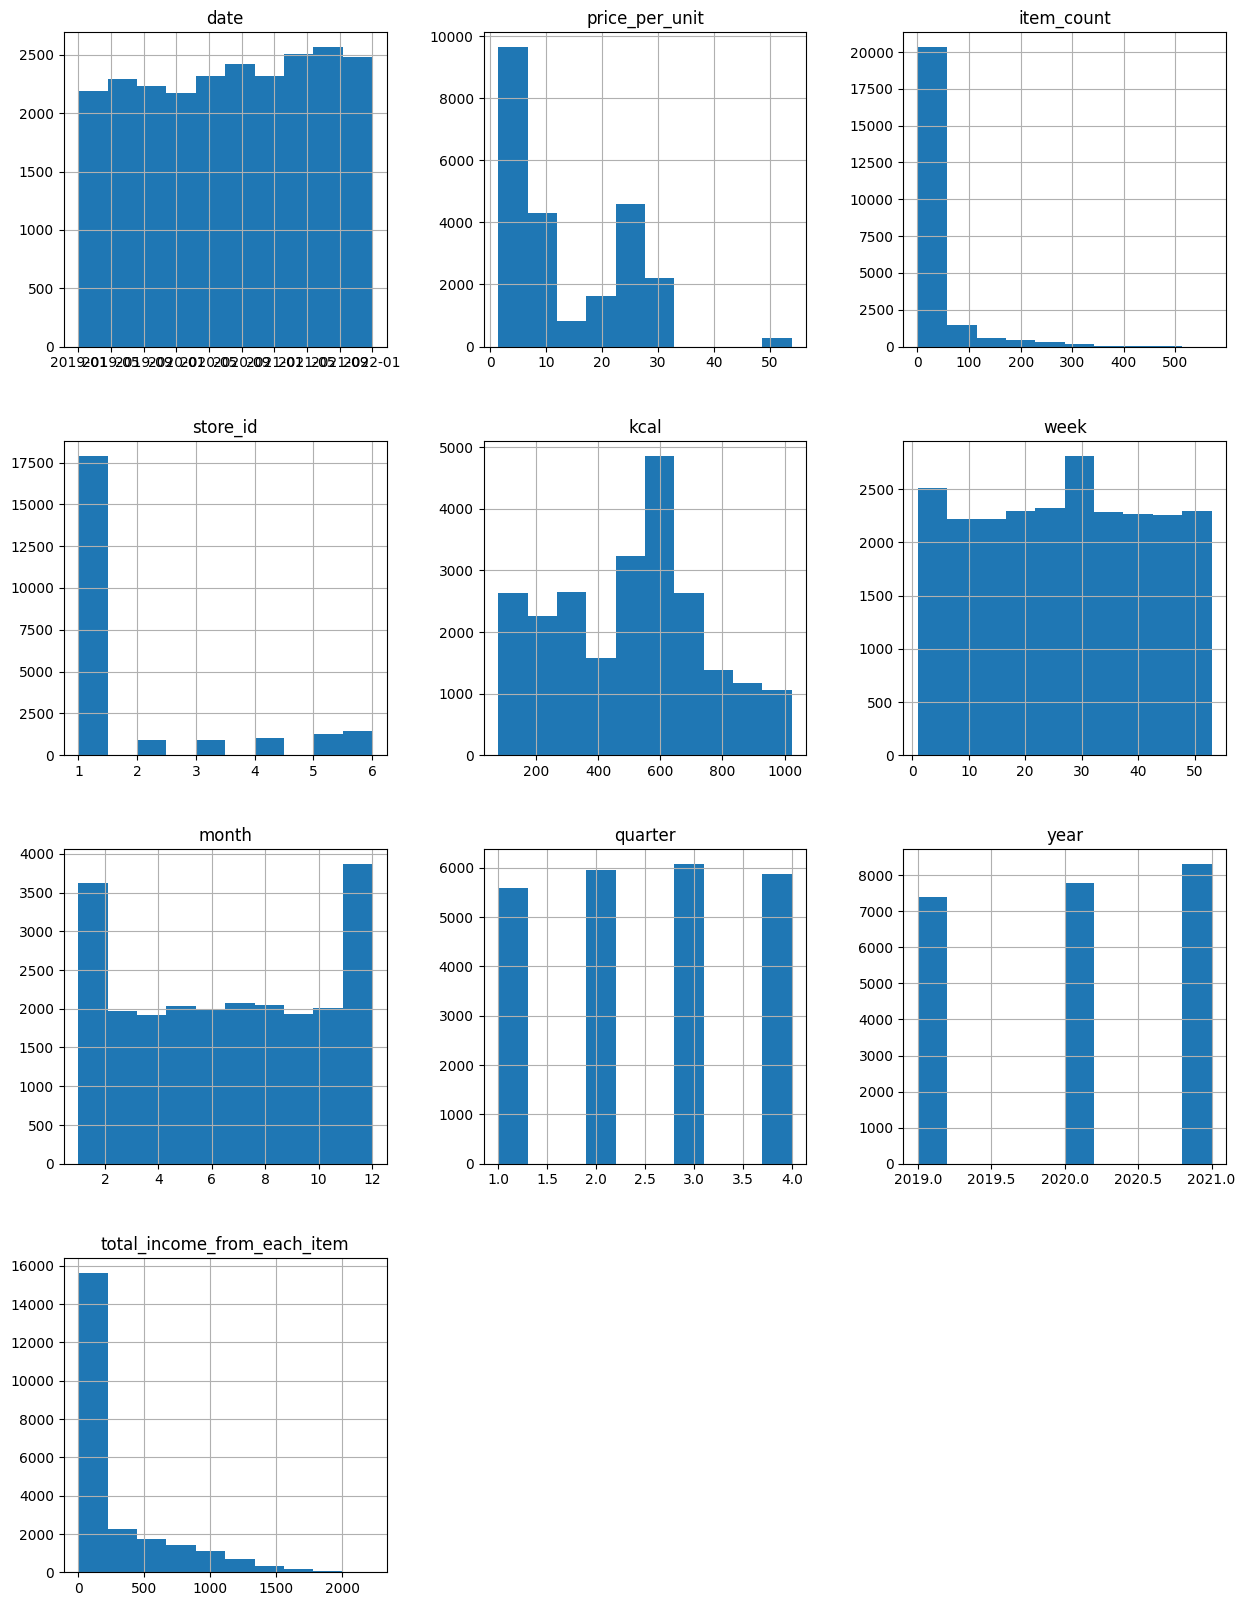

In [139]:
df_actual_sales.hist(figsize=(15,20))

#### These histograms show: (1) Out of 23,484 records, over 17,500 were from Bob's Diner. This is an overwhelming majority.(2) The end of the year and beginning of the year show increased items sold. (3) Sales are roughly consistent when averaged across quarters and across years.

In [140]:
# Find the total count of each item sold over 3 years across all 6 restaurants

total_count_per_item = df_final.groupby(['restaurant_name', 'item_name'])['item_count'].sum()

In [141]:
total_count_per_item

restaurant_name  item_name                      
Beachfront Bar   Awesome Vodka Cocktail               12.0
                 Fantastic Milky Smoothy            1147.0
                 Original Crazy Cocktail             106.0
                 Original Gin Cocktail                21.0
                 Original Sweet Milky Soft Drink       0.0
                                                     ...  
Sweet Shack      Fantastic Cake                       14.0
                 Fantastic Milky Smoothy              18.0
                 Milky vegi Smoothy                    6.0
                 Original Milky Cake                   0.0
                 Original Sweet Milky Soft Drink       1.0
Name: item_count, Length: 100, dtype: float64

#### Figure out which items are not selling at all (total count = 0)

In [142]:
# Filter to find items with a total count of zero
zero_count_items = total_count_per_item[total_count_per_item == 0]

# Display the items with zero count
print("Items with zero count")
print(zero_count_items)

Items with zero count
restaurant_name  item_name                                 
Beachfront Bar   Original Sweet Milky Soft Drink               0.0
Corner Cafe      Awesome Fruity Lamb with Vegetables Dinner    0.0
                 Milky Cake                                    0.0
                 Original Fruity Carrot Cake                   0.0
Fou Cher         Fantastic Fruity Salmon with Bread meal       0.0
                 Original Milky Cake                           0.0
Sweet Shack      Blue Ribbon Frozen Milky Cake                 0.0
                 Original Milky Cake                           0.0
Name: item_count, dtype: float64


In [143]:
total_count_per_item.describe()

count       100.000000
mean       6947.870000
std       27540.131787
min           0.000000
25%          10.000000
50%          52.000000
75%         273.500000
max      236337.000000
Name: item_count, dtype: float64

In [144]:
items_that_sell = total_count_per_item[total_count_per_item != 0]

items_that_sell

restaurant_name  item_name                      
Beachfront Bar   Awesome Vodka Cocktail               12.0
                 Fantastic Milky Smoothy            1147.0
                 Original Crazy Cocktail             106.0
                 Original Gin Cocktail                21.0
                 Sweet Vegi Soft Drink                19.0
                                                     ...  
Sweet Shack      Blue Ribbon Milky Cake                5.0
                 Fantastic Cake                       14.0
                 Fantastic Milky Smoothy              18.0
                 Milky vegi Smoothy                    6.0
                 Original Sweet Milky Soft Drink       1.0
Name: item_count, Length: 92, dtype: float64

#### This confirms that 8 items haven't been sold at all from Jan 2019-Dec 2021

### Examine date-wise sales

In [145]:
# Examine the difference in sales between quarters 
sales_per_quarter = df_final.groupby(['restaurant_name', 'quarter'])['total_income_from_each_item'].sum()

#

In [146]:
sales_per_quarter

restaurant_name  quarter
Beachfront Bar   1              973.88
                 2              943.28
                 3              889.16
                 4              989.88
Bob's Diner      1          1252474.58
                 2          1911399.12
                 3          1886218.17
                 4          1287183.82
Corner Cafe      1             3632.98
                 2             4310.61
                 3             4288.40
                 4             4319.44
Fou Cher         1             6958.16
                 2             7337.96
                 3             5843.43
                 4             7745.82
Surfs Up         1             3832.77
                 2             3993.62
                 3             4112.29
                 4             3712.81
Sweet Shack      1              651.92
                 2              653.03
                 3              639.70
                 4              633.62
Name: total_income_from_each_item, dtyp

In [147]:
# Examine sales on different days of the week

sales_per_day_of_week = df_final.groupby(['restaurant_name', 'day_of_week'])['total_income_from_each_item'].sum()

sales_per_day_of_week

restaurant_name  day_of_week
Beachfront Bar   Friday             508.79
                 Monday             544.78
                 Saturday           538.93
                 Sunday             523.11
                 Thursday           518.58
                 Tuesday            548.72
                 Wednesday          613.29
Bob's Diner      Friday         1247393.16
                 Monday          635165.98
                 Saturday       1241421.51
                 Sunday          621069.50
                 Thursday       1063813.76
                 Tuesday         725443.80
                 Wednesday       802967.98
Corner Cafe      Friday            2460.83
                 Monday            2395.01
                 Saturday          2317.59
                 Sunday            2426.59
                 Thursday          2343.02
                 Tuesday           2487.38
                 Wednesday         2121.01
Fou Cher         Friday            4227.35
                 Monday  

 ## Machine Learning

#### Split the dataset into testing and training data. Use the data from the last six months as the testing data. Extract the split date

#### Drop features that are only contributing noise

##### I am going to drop 'store_id' since it has no value as a numerical number. I will drop item_name as it is not numerical and using getdummies on it may introduce noise. I am going to use getdummies on restaurant name and day of week because this is important categorical information.

In [148]:
#Convert categorical columns into numerical data

df_final_numerical = pd.get_dummies(df_final, columns= ['restaurant_name', 'day_of_week'], dtype=int)

In [149]:
features_to_drop = ['item_name', 'store_id']

df_for_modeling = df_final_numerical.drop(features_to_drop, axis=1)

In [150]:
# Define the X and the y
X = df_for_modeling.drop('item_count', axis=1)
y = df_for_modeling['item_count']

In [151]:
# Identify the split point: 6 months before the last date in the dataset
split_date = df_for_modeling['date'].max() - pd.DateOffset(months=6)

# Split the data
train_data = df_for_modeling[df_for_modeling['date'] < split_date]
test_data = df_for_modeling[df_for_modeling['date'] >= split_date]

In [152]:
# Prepare the feature matrix (X) and target vector (y)
X_train = train_data.drop(['item_count', 'date'], axis=1)
y_train = train_data['item_count']
X_test = test_data.drop(['item_count', 'date'], axis=1)
y_test = test_data['item_count']

In [153]:
# Normalize the data

from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit on training data
scaler.fit(X_train)  # Calculate mean and standard deviation only from the training data

# Transform training data
X_train_scaled = scaler.transform(X_train)

# Transform testing data
X_test_scaled = scaler.transform(X_test)


In [154]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [155]:
# Create a linear regression model instance
lin_reg_model = LinearRegression()

# Train the model using the training sets
lin_reg_model.fit(X_train_scaled, y_train)

# Predicting the target values of the test set
y_pred = lin_reg_model.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Root Mean Squared Error for linear regression model: {rmse}")


Root Mean Squared Error for linear regression model: 21.442951835568017


#### This is a bad model based on RMSE

#### Random Forest Model

In [156]:
from sklearn.ensemble import RandomForestRegressor  


In [157]:
# Create a Random Forest Regressor
rf_model = RandomForestRegressor(random_state=123)

# Train the model using the training sets
rf_model.fit(X_train_scaled, y_train)

# Predicting the target values of the test set
rf_y_pred = rf_model.predict(X_test_scaled)

# Calculating the Mean Squared Error and R-squared value
mse_rf = mean_squared_error(y_test, rf_y_pred)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, rf_y_pred)

print(f"Root Mean Squared Error: {rmse_rf}")
print(f"R^2 Score: {r2_rf}")



Root Mean Squared Error: 0.3391779968003726
R^2 Score: 0.9998794554527658


#### XGBoost Model

In [158]:
from xgboost import XGBRegressor

# Initialize the regressor
xgb_model = XGBRegressor()
# Train the model
xgb_model.fit(X_train_scaled, y_train)  



XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [159]:
y_pred_xgb = xgb_model.predict(X_test_scaled)


In [160]:
#Calculate Root Mean Squared Error 
mse = mean_squared_error(y_test, y_pred)
rmse = mse**0.5
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R^2 Score: {r2}")


Mean Squared Error: 459.80018342248974
Root Mean Squared Error: 21.442951835568017
R^2 Score: 0.5182060207894293


#### The Random Forest Classifier had the best predictions.

### Deep Learning

In [161]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.model_selection import train_test_split

In [166]:
df_for_modeling

,date,price_per_unit,item_count,kcal,week,month,quarter,year,total_income_from_each_item,restaurant_name_Beachfront Bar,...,restaurant_name_Fou Cher,restaurant_name_Surfs Up,restaurant_name_Sweet Shack,day_of_week_Friday,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday
0,2019-01-01,29.22,2.0,931,1,1,1,2019,58.44,0,...,0,0,0,0,0,0,0,0,1,0
1,2019-01-01,26.42,22.0,763,1,1,1,2019,581.24,0,...,0,0,0,0,0,0,0,0,1,0
2,2019-01-01,4.87,7.0,478,1,1,1,2019,34.09,0,...,0,0,0,0,0,0,0,0,1,0
3,2019-01-01,4.18,12.0,490,1,1,1,2019,50.16,0,...,0,0,0,0,0,0,0,0,1,0
4,2019-01-01,3.21,136.0,284,1,1,1,2019,436.56,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109595,2021-12-31,1.39,0.0,78,52,12,4,2021,0.00,0,...,0,0,1,1,0,0,0,0,0,0
109596,2021-12-31,5.68,0.0,535,52,12,4,2021,0.00,0,...,0,0,1,1,0,0,0,0,0,0
109597,2021-12-31,7.70,0.0,636,52,12,4,2021,0.00,0,...,0,0,1,1,0,0,0,0,0,0
109598,2021-12-31,5.11,0.0,383,52,12,4,2021,0.00,0,...,0,0,1,1,0,0,0,0,0,0


In [162]:
# Split features (X) and target variable (y)
X = df_for_modeling.drop('total_income_from_each_item', axis=1)
y = df_for_modeling['total_income_from_each_item']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Initialize the scaler
scaler = StandardScaler()

# Fit on training data
scaler.fit(X_train)  # Calculate mean and standard deviation only from the training data

# Transform training data
X_train_scaled = scaler.transform(X_train)

# Transform testing data
X_test_scaled = scaler.transform(X_test)


In [165]:
print("Shape of X_train_scaled:", X_train_scaled.shape)

Shape of X_train_scaled: (91100, 20)


In [169]:
# Reshape input data to include 'date' as a third dimension
# Specify sequence length and other parameters as needed
sequence_length = 7
n_features = X_train_scaled.shape[1]
n_samples = len(X_train_scaled) - sequence_length + 1

# Reshape input data
X_reshaped = np.zeros((n_samples, sequence_length, n_features))

for i in range(n_samples):
    X_reshaped[i] = X_train_scaled[i:i+sequence_length]

# Verify the shape of the reshaped input data
print("Shape of X_reshaped:", X_reshaped.shape)

Shape of X_reshaped: (91094, 7, 20)


In [171]:
# Define the LSTM model
lstm_model = Sequential([
    LSTM(units=50, input_shape=(7, 20)),  # LSTM layer with 50 units and input shape (7, 20)
    Dense(units=1)  # Output layer with 1 unit
])

# Compile the model
lstm_model.compile(optimizer='adam', loss='mse')

# Print model summary
print(lstm_model.summary())


c:\Users\Sonal\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 50)             │        14,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,251 (55.67 KB)

 Trainable params: 14,251 (55.67 KB)

 Non-trainable params: 0 (0.00 B)

None
